In [8]:
import pymysql
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)

(2464, 3280, 3)
['process_56dbcc1cdab511eaaa39b42e99c8ec5d', 4, 310, 'photo_38b8f148dab511eaaf91b42e99c8ec5d', '2020-08-10 10:57:31']


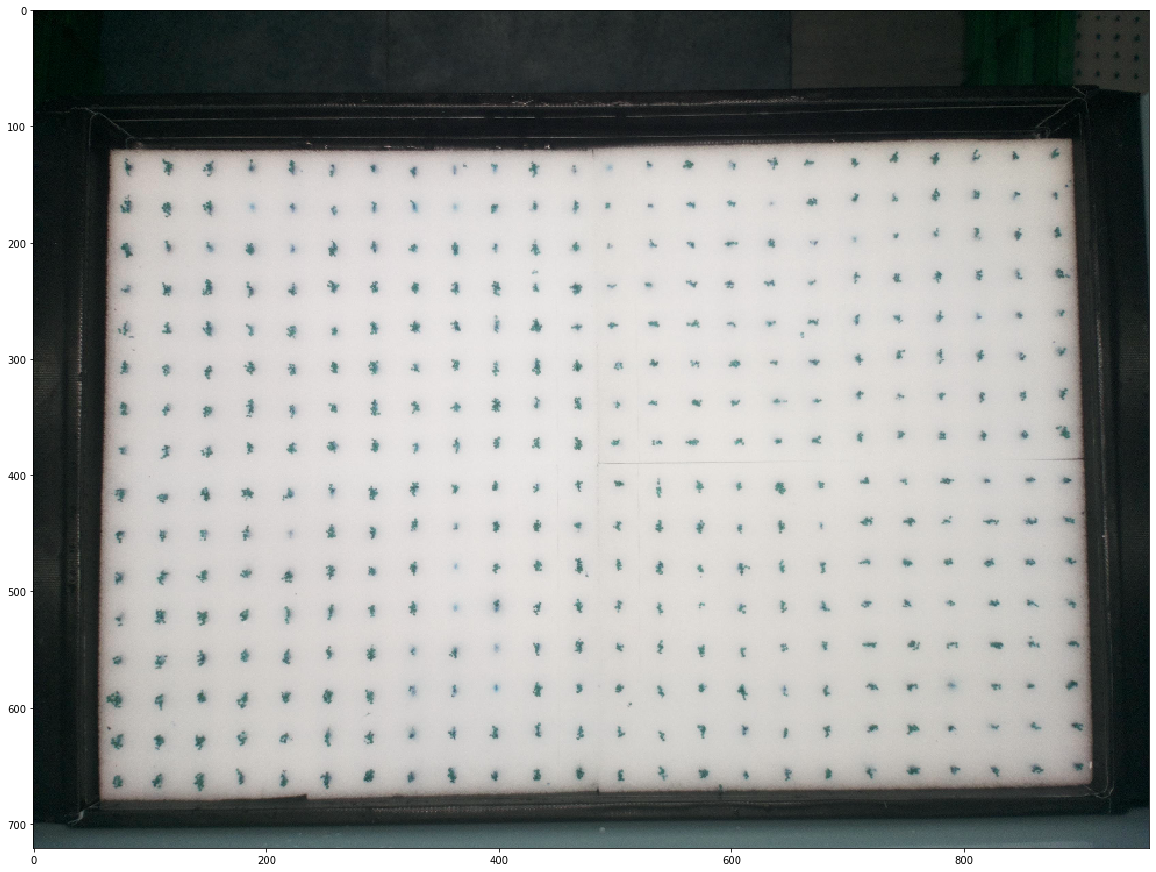

In [48]:
db = pymysql.connect(host='127.0.0.1',
                             port=3306,
                             user='root',
                             password='yyos12345678',
                             db='yyostech_2')
cursor = db.cursor()
schedule_id = '200804011'
datetimes = None
# datetimes = '2020-08-17 11:53:09'
if datetimes == None:
    sql=f'''
        SELECT a.process_id, a.piece, a.germination_cnt, a.image_id, b.image, b.create_datetime
        FROM yyostech_2.process a
        inner join yyostech_2.raspi_image b on a.image_id = b.image_id
        where schedule_id = '{schedule_id}'
        order by b.image, b.create_datetime
        limit 1;
        '''
    cursor.execute(sql)
else:
    sql=f'''
        SELECT a.process_id, a.piece, a.germination_cnt, a.image_id, b.image, b.create_datetime
        FROM yyostech_2.process a
        inner join yyostech_2.raspi_image b on a.image_id = b.image_id
        where schedule_id = '{schedule_id}'
        and b.create_datetime < '{datetimes}'
        order by b.image, b.create_datetime
        limit 1;
        '''
    cursor.execute(sql)
data = cursor.fetchone() 
if data != None:
    datetimes = str(data[5])
    nparr = np.frombuffer(data[4], np.uint8)
    frame = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    print(frame.shape)
    frame = cv2.resize(frame, (960, int((960/frame.shape[1])*frame.shape[0])), interpolation=cv2.INTER_CUBIC)
    data_list = [data[0], data[1], data[2], data[3], str(data[5])]
    print(data_list)
    plt.imshow(frame)
else:
    frame = None
    data_list = None
    print('empty')

In [20]:
data